# Mini Project 5-3 Explore Sampling

## Introduction
In this project, you will engage in effective sampling of a dataset in order to make it easier to analyze. As a data professional you will often work with extremely large datasets, and utilizing proper sampling techniques helps you improve your efficiency in this work. 

For this project, you are a member of an analytics team for the Environmental Protection Agency. You are assigned to analyze data on air quality with respect to carbon monoxide—a major air pollutant—and report your findings. The data utilized in this project includes information from over 200 sites, identified by their state name, county name, city name, and local site name. You will use effective sampling within this dataset. 

## Step 1: Imports

### Import packages

Import `pandas`,  `numpy`, `matplotlib`, `statsmodels`, and `scipy`. 

In [3]:
# Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

### Load the dataset

As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Import data.
Airquality = pd.read_csv('c4_epa_air_quality.csv')
Airquality = Airquality.dropna()


In [5]:
# First 10 rows of the data

Airquality.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
10,10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3


## Step 2: Data exploration

### Examine the data

To understand how the dataset is structured, examine the first 10 rows of the data.

In [6]:
# First 10 rows of the data

Airquality.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
10,10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3


### Generate a table of descriptive statistics

Generate a table of some descriptive statistics about the data. Specify that all columns of the input be included in the output.

In [7]:
# Code Here
Airquality.describe(include="all")

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,257.000000,257,257,257,257,257,257,257,257.000000,257.000000
unique,NaN,1,51,148,188,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,257,66,14,21,2,257,257,NaN,NaN
mean,129.766537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404578,6.782101
std,74.675286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.319311,7.091422
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,130.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.278947,5.000000
75%,194.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516667,9.000000


**Question:** Based on the preceding table of descriptive statistics, what is the mean value of the `aqi` column? 

A: It is 6.782

**Question:** Based on the preceding table of descriptive statistics, what do you notice about the count value for the `aqi` column?

A: It is 257. This means that there are no missing values for this column

### Use the `mean()` function on the `aqi`  column

Now, use the `mean()` function on the `aqi`  column and assign the value to a variable `population_mean`. The value should be the same as the one generated by the `describe()` method in the above table. 

In [8]:
# Code Here
population_mean = Airquality['aqi'].mean()
print(population_mean)

6.782101167315175


## Step 3: Statistical tests

### Sample with replacement

First, name a new variable `sampled_data`. Then, use the `sample()` dataframe method to draw 50 samples from `epa_data`. Set `replace` equal to `'True'` to specify sampling with replacement. For `random_state`, choose an arbitrary number for random seed. Make that arbitrary number `42`.

In [9]:
# Code Here

sampled_data = Airquality.sample(n=50, replace=True, random_state=42)

print(sampled_data)

     Unnamed: 0  date_local      state_name            county_name  \
104         104  2018-01-01         Arizona                   Pima   
108         108  2018-01-01    North Dakota               Burleigh   
73           73  2018-01-01       Minnesota                 Dakota   
190         190  2018-01-01      California                 Madera   
21           21  2018-01-01            Iowa                   Linn   
104         104  2018-01-01         Arizona                   Pima   
123         123  2018-01-01        Michigan                  Wayne   
216         216  2018-01-01         Indiana            Vanderburgh   
89           89  2018-01-01        Maryland                 Howard   
101         101  2018-01-01    Pennsylvania                  Adams   
153         153  2018-01-01           Texas                  Bexar   
132         132  2018-01-01      California            Los Angeles   
151         151  2018-01-01      California                 Orange   
193         193  201

### Output the first 10 rows

Output the first 10 rows of the DataFrame. 

In [10]:
# Code Here

print(sampled_data.head(10))

     Unnamed: 0  date_local    state_name  county_name      city_name  \
104         104  2018-01-01       Arizona         Pima         Tucson   
108         108  2018-01-01  North Dakota     Burleigh       Bismarck   
73           73  2018-01-01     Minnesota       Dakota      Lakeville   
190         190  2018-01-01    California       Madera         Madera   
21           21  2018-01-01          Iowa         Linn   Cedar Rapids   
104         104  2018-01-01       Arizona         Pima         Tucson   
123         123  2018-01-01      Michigan        Wayne        Detroit   
216         216  2018-01-01       Indiana  Vanderburgh     Evansville   
89           89  2018-01-01      Maryland       Howard   North Laurel   
101         101  2018-01-01  Pennsylvania        Adams  Not in a city   

              local_site_name   parameter_name   units_of_measure  \
104           22ND & ALVERNON  Carbon monoxide  Parts per million   
108      BISMARCK RESIDENTIAL  Carbon monoxide  Parts per 

**Question:** In the DataFrame output, why is the row index 102 repeated twice? 

A: Row 104 is repeated twice because we have replace = true which causes the same row to be repeated multiple times

**Question:** What does `random_state` do?

A: It causes python to stat the random number generator in a predictable way and hence I will get the same result consistently

### Compute the mean value from the `aqi` column

Compute the mean value from the `aqi` column in `sampled_data` and assign the value to the variable `sample_mean`.

In [11]:
# Code Here

sample_mean = sampled_data['aqi'].mean()

print(sample_mean)

6.08


You have a 95% confidence interval for the mean district literacy rate that stretches from about X % to Y%. 

95% CI: (X, Y)

 **Question:**  Why is `sample_mean` different from `population_mean`?


A: Because they represent different subsets of data and are not perfect samples of each other hence causing different staistical properties

### Apply the central limit theorem

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. According to the **central limit theorem**, the mean of a sampling distribution should be roughly equal to the population mean. Complete the following steps to compute the mean of the sampling distribution with 10,000 samples. 

* Create an empty list and assign it to a variable called `estimate_list`. 
* Iterate through a `for` loop 10,000 times. To do this, make sure to utilize the `range()` function to generate a sequence of numbers from 0 to 9,999. 
* In each iteration of the loop, use the `sample()` function to take a random sample (with replacement) of 50 AQI values from the population. Do not set `random_state` to a value.
* Use the list `append()` function to add the value of the sample `mean` to each item in the list.


In [12]:
# Code Here
estimate_list = []
for i in range(10000):
    estimate_list.append(Airquality['aqi'].sample(n=50, replace=True).mean())


### Create a new DataFrame

Next, create a new DataFrame from the list of 10,000 estimates. Name the new variable `estimate_df`.

In [13]:
# Code Here
estimate_df = pd.DataFrame(data={'estimate': estimate_list})

### Compute the mean() of the sampling distribution

Next, compute the `mean()` of the sampling distribution of 10,000 random samples and store the result in a new variable `mean_sample_means`.

In [14]:
# Code Here

mean_sample_means = estimate_df['estimate'].mean()


**Question:** What is the mean for the sampling distribution of 10,000 random samples?

In [15]:
# Code Here
print(mean_sample_means)

6.798032000000001


**Question:** How are the central limit theorem and random sampling (with replacement) related?

A: Random sampling with replacement allows us to collect the samples necessary to eventually form the cnetral limit theorem

A:

### Output the distribution using a histogram

Output the distribution of these estimates using a histogram. This provides an idea of the sampling distribution.

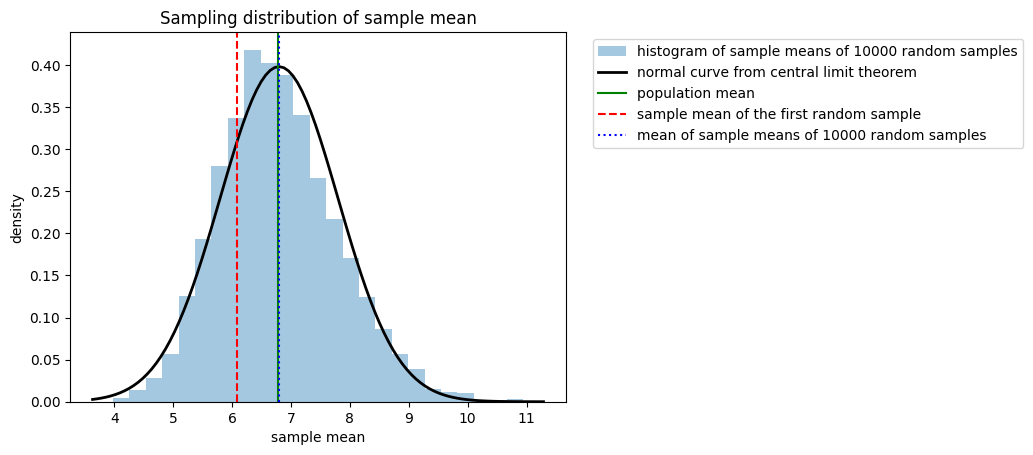

In [16]:
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, mean_sample_means, stats.tstd(estimate_df['estimate']))
plt.plot(x, p,'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='g', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

### Calculate the standard error

Calculate the standard error of the mean AQI using the initial sample of 50. The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

In [17]:
# Code Here

import numpy as np

# Calculate the standard deviation of the sample
sample_std = sampled_data['aqi'].std()

# Calculate standard error
standard_error = sample_std / np.sqrt(50)

# Print
print("Standard Error:", standard_error)

Standard Error: 1.1313131254233295


In [18]:
# First 10 rows of the data

Airquality.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
10,10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3


## Step 4: Results and evaluation

###  Visualize the relationship between the sampling and normal distributions

Visualize the relationship between your sampling distribution of 10,000 estimates and the normal distribution.

1. Plot a histogram of the 10,000 sample means 
2. Add a vertical line indicating the mean of the first single sample of 50
3. Add another vertical line indicating the mean of the means of the 10,000 samples 
4. Add a third vertical line indicating the mean of the actual population

In [19]:
# Code Here

**Question:** What insights did you gain from the preceding sampling distribution?

A: That it fits for the most part as a normal distribution. The mean goes through the middle fo the distribution as it should and both the mean population mean and mean of 10000 samples are overlapping. The first randome sample that was done fo 50 observations has a mean that is too far left but with enough samples like 10000 it evens out

# Considerations

**What are some key takeaways that you learned from this project?**

A: The ability to sample parts of a data set as well as running through multiple observations to create visualizations. 

**What findings would you share with others?**

A: THe 10000 samples are unbiased and fairly represent the dataset. The first sample mean was away from the population mean showing some variability. Also that the central limit theory is being clearly shown

**What would you convey to external readers?**

A: The average of the air quality is 6.8 parts per million. The averages of 50 measurements van give us a solid idea of the average of the entire data set and we hence do not need to sample every site.